<a href="https://colab.research.google.com/github/andresvosa/testNotebooks/blob/main/StrawSim_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [179]:
# Read measured straw data 
straw_df = pd.read_excel('Straw_Measurements.xlsx')
straw_df = straw_df.drop(['Unnamed: 0'], axis=1)
straw_df = straw_df.dropna(how='all')
straw_df['Straw_ID'] = straw_df['Straw_ID'].astype('int64')
straw_df.head()

,Straw_ID,Length,Diameter_u,Angle_v,Angle_h
1,1,150.0,6.08,0.00,0.0
2,1,155.0,6.19,1.99,NaN
3,1,190.0,5.74,1.77,NaN
4,1,228.0,5.33,4.53,NaN
5,1,215.0,5.20,1.01,NaN


In [180]:
#straw_df.dtypes
straw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 1 to 36
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Straw_ID    32 non-null     int64  
 1   Length      32 non-null     float64
 2   Diameter_u  32 non-null     float64
 3   Angle_v     32 non-null     float64
 4   Angle_h     8 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 1.5 KB


In [181]:
straw_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Straw_ID,32.0,2.906250,1.444888,1.00,2.000,3.000,4.0000,5.00
Length,32.0,197.531250,39.370846,110.00,170.000,201.500,228.5000,252.00
Diameter_u,32.0,5.434062,0.649361,4.19,5.055,5.435,6.0000,6.57
Angle_v,32.0,3.228438,3.446365,0.00,0.000,2.280,4.5075,12.88
Angle_h,8.0,0.000000,0.000000,0.00,0.000,0.000,0.0000,0.00


array([[<AxesSubplot: title={'center': 'Length'}>,
        <AxesSubplot: title={'center': 'Diameter_u'}>],
       [<AxesSubplot: title={'center': 'Angle_v'}>, <AxesSubplot: >]],
      dtype=object)

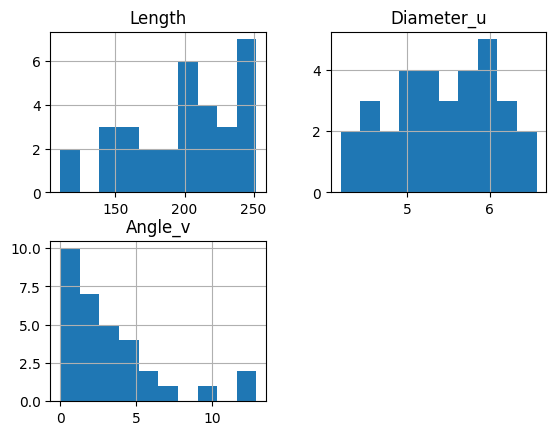

In [182]:
straw_df.hist(column=['Length', 'Diameter_u', 'Angle_v'])

0.7789023492405533
0.02028344221570677


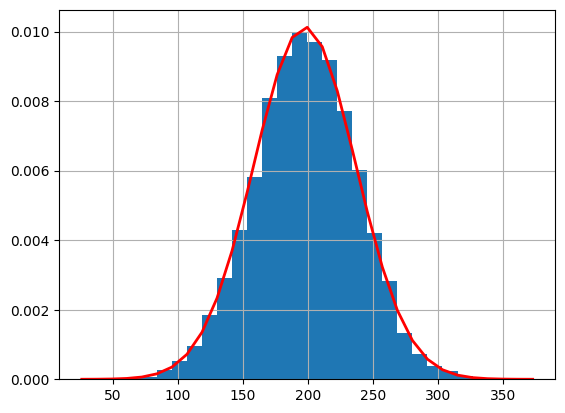

In [183]:
# Try to simulate lengths
no_of_samples = 10000 # number of samples 
mu, sigma = 197.531250, 39.370846 #mean and standard deviation
lens = np.random.normal(mu, sigma, no_of_samples)
# print(lens)
print(abs(mu - np.mean(lens)))
print(abs(sigma - np.std(lens, ddof=1)))
# Drawing distribution
count, bins, ignored = plt.hist(lens, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.grid()
plt.show()

0.010176088144789652
0.0038912395068754213


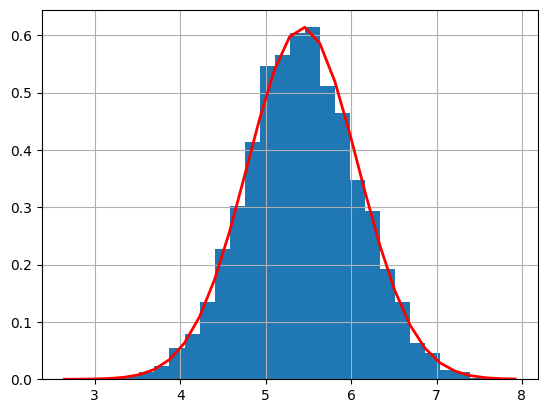

In [184]:
# Simulating diameters
mu_d, sigma_d = 5.434062, 0.649361 #mean and standard deviation
diams = np.random.normal(mu_d, sigma_d, no_of_samples)
# print(diams)
print(abs(mu_d - np.mean(diams)))
print(abs(sigma_d - np.std(diams, ddof=1)))
# Drawing distribution
count, bins, ignored = plt.hist(diams, 30, density=True)
plt.plot(bins, 1/(sigma_d * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu_d)**2 / (2 * sigma_d**2) ),
         linewidth=2, color='r')
plt.grid()
plt.show()

0.03662340622984095
0.026147368293850892


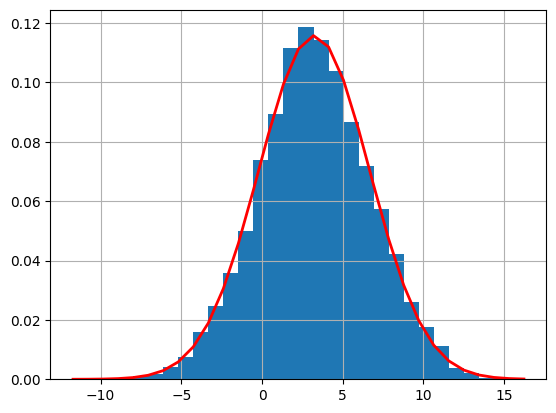

In [185]:
# Simulating vertical angles
mu_v, sigma_v = 3.228438, 3.446365 #mean and standard deviation
v_angles = np.random.normal(mu_v, sigma_v, no_of_samples)
# print(v_angles)
print(abs(mu_v - np.mean(v_angles)))
print(abs(sigma_v - np.std(v_angles, ddof=1)))
# Drawing distribution
count, bins, ignored = plt.hist(v_angles, 30, density=True)
plt.plot(bins, 1/(sigma_v * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu_v)**2 / (2 * sigma_v**2) ),
         linewidth=2, color='r')
plt.grid()
plt.show()

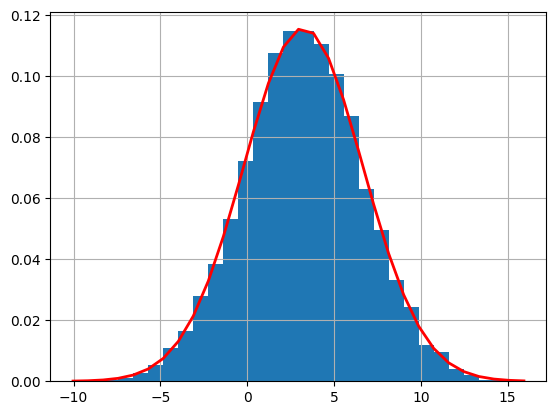

In [186]:
# Simulating horisontal angles
mu_h, sigma_h = 3.228438, 3.446365 #mean and standard deviation
h_angles = np.random.normal(mu_h, sigma_h, no_of_samples)
#low, high = 0.0, 360.0
#h_angles = np.random.uniform(low, high, no_of_samples)
# print(h_angles)
# Drawing distribution
count, bins, ignored = plt.hist(h_angles, 30, density=True)
plt.plot(bins, 1/(sigma_h * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu_h)**2 / (2 * sigma_h**2) ),
         linewidth=2, color='r')
plt.grid()
plt.show()

In [187]:
# Creating simulated straw dataframe
id_zeros = np.zeros(no_of_samples, dtype='int64')
#simu_array = np.stack((id_zeros, lens, diams, v_angles, h_angles), axis=1)
column_names = straw_df.columns.to_list()
#straw_simu_df = pd.DataFrame(simu_array, column_names)
straw_simu_df = pd.DataFrame({column_names[0]: id_zeros.tolist(), 
                              column_names[1]:  lens.tolist(),
                              column_names[2]:  diams.tolist(),
                              column_names[3]:  np.abs(v_angles).tolist(),
                              column_names[4]:  h_angles.tolist()})
straw_simu_df.head()

,Straw_ID,Length,Diameter_u,Angle_v,Angle_h
0,0,190.119316,5.133502,0.947922,2.345013
1,0,189.539152,5.562928,0.633601,-1.816461
2,0,210.787642,6.878999,0.649889,6.654796
3,0,211.795314,6.309357,6.680083,2.521814
4,0,125.949105,5.511447,1.275730,8.355938


In [188]:
# Get random straw from simulated straw dataframe
sections_list = [5, 6, 7, 8, 9, 10, 11] # How many sections in straw can have
sections_selected = np.random.choice(sections_list, 1) # Select random sections
rnd_straw = straw_simu_df.sample(n=sections_selected, axis='rows', replace=True)
rnd_straw.iloc[0, -1] = 0.0 # First length angles are 0
rnd_straw.iloc[0, -2] = 0.0
print ('Sections: ' + str(sections_selected))
print('Straw length: ' + str(rnd_straw['Length'].sum()) + 'mm')
rnd_straw

Sections: [9]
Straw length: 1925.5602899570072mm


,Straw_ID,Length,Diameter_u,Angle_v,Angle_h
2441,0,176.323243,5.087556,0.000000,0.000000
5346,0,228.464749,5.607591,2.568999,7.864186
6835,0,205.438653,6.492585,6.594537,0.743901
2503,0,232.334317,5.830132,4.584640,0.452639
5040,0,218.552649,5.278074,3.516411,0.332084
1400,0,217.225608,5.764701,3.463205,8.307716
6420,0,238.268844,5.300831,1.039215,12.469337
5198,0,208.970249,4.726250,1.802102,7.800389
9349,0,199.981978,5.621355,10.107310,-0.079409


In [189]:
# Functions to calculate end point coordinates
def sphere_to_chart(length : float, betha_xz : float, alpha_xy : float, x_st : float=0.0, y_st : float=0.0, z_st : float=0.0) -> float:
    betha_xz_rad = np.deg2rad(betha_xz)
    alpha_xy_rad = np.deg2rad(90.0 - alpha_xy)
    return x_st + (length * np.cos(betha_xz_rad) * np.sin(alpha_xy_rad)), y_st + (length * np.cos(betha_xz_rad) * np.cos(alpha_xy_rad)), z_st + (length * np.sin(betha_xz_rad))

def apply_wrapper(x):
    return sphere_to_chart(x['Length'], x['Angle_v'], x['Angle_h'])


In [190]:
# print(rnd_straw.apply(apply_wrapper, axis=1, result_type="expand"))
rnd_straw[['x', 'y', 'z']] = rnd_straw.apply(apply_wrapper, axis=1, result_type="expand")
rnd_straw

,Straw_ID,Length,Diameter_u,Angle_v,Angle_h,x,y,z
2441,0,176.323243,5.087556,0.000000,0.000000,176.323243,1.079668e-14,0.000000
5346,0,228.464749,5.607591,2.568999,7.864186,226.088625,3.122836e+01,10.240353
6835,0,205.438653,6.492585,6.594537,0.743901,204.062212,2.649594e+00,23.593074
2503,0,232.334317,5.830132,4.584640,0.452639,231.583700,1.829557e+00,18.570878
5040,0,218.552649,5.278074,3.516411,0.332084,218.137509,1.264329e+00,13.404803
1400,0,217.225608,5.764701,3.463205,8.307716,214.553581,3.132949e+01,13.122064
6420,0,238.268844,5.300831,1.039215,12.469337,232.610221,5.143785e+01,4.321417
5198,0,208.970249,4.726250,1.802102,7.800389,206.934232,2.834790e+01,6.571577
9349,0,199.981978,5.621355,10.107310,-0.079409,196.878228,-2.728639e-01,35.095304


In [191]:
def vec_len_3d (x : float, y : float, z: float) -> float:
    return np.sqrt(x**2 + y**2 + z**2)

def test_shift(x):
    print(x, type(x))

In [192]:
x, y, z = sphere_to_chart(220.047272, 3.907266,	2.598694)
print(x, y, z)
print(vec_len_3d(x, y, z))
x, y, z = sphere_to_chart(220.047272, 2.598694, 3.907266,)
print(x, y, z)
print(vec_len_3d(x, y, z))

219.3100342688166 9.953801125613124 14.994419855540198
220.047272
219.3100342688166 14.978999647168285 9.976991190865473
220.047272


In [193]:
rnd_straw.apply(test_shift, axis=1, result_type="expand")

Straw_ID      0.000000e+00
Length        1.763232e+02
Diameter_u    5.087556e+00
Angle_v       0.000000e+00
Angle_h       0.000000e+00
x             1.763232e+02
y             1.079668e-14
z             0.000000e+00
Name: 2441, dtype: float64 <class 'pandas.core.series.Series'>
Straw_ID        0.000000
Length        228.464749
Diameter_u      5.607591
Angle_v         2.568999
Angle_h         7.864186
x             226.088625
y              31.228358
z              10.240353
Name: 5346, dtype: float64 <class 'pandas.core.series.Series'>
Straw_ID        0.000000
Length        205.438653
Diameter_u      6.492585
Angle_v         6.594537
Angle_h         0.743901
x             204.062212
y               2.649594
z              23.593074
Name: 6835, dtype: float64 <class 'pandas.core.series.Series'>
Straw_ID        0.000000
Length        232.334317
Diameter_u      5.830132
Angle_v         4.584640
Angle_h         0.452639
x             231.583700
y               1.829557
z              18.57

2441    None
5346    None
6835    None
2503    None
5040    None
1400    None
6420    None
5198    None
9349    None
dtype: object